In [77]:
## [1-1] 모듈로딩 - 데이터 분석용
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [78]:
## [1-2] 데이터 준비
DATA_FILE ='../data/ObesityDataSet_raw_and_data_sinthetic.csv'

In [79]:
## - 데이터 로딩
DF = pd.read_csv(DATA_FILE, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11], engine='python')
DF

,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CH2O
0,1,21,1.62,64.00,24.386526,1,0,2.0,3.0,1,2.00
1,1,21,1.52,56.00,24.238227,1,0,3.0,3.0,1,3.00
2,0,23,1.80,77.00,23.765432,1,0,2.0,3.0,1,2.00
3,0,27,1.80,87.00,26.851852,0,0,3.0,3.0,1,2.00
4,0,22,1.78,89.80,28.342381,0,0,2.0,1.0,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1.71,131.41,44.940324,1,1,3.0,3.0,1,1.73
2107,1,22,1.75,133.74,43.670204,1,1,3.0,3.0,1,2.01
2108,1,23,1.75,133.69,43.653878,1,1,3.0,3.0,1,2.05
2109,1,24,1.74,133.35,44.044788,1,1,3.0,3.0,1,2.85


탐색

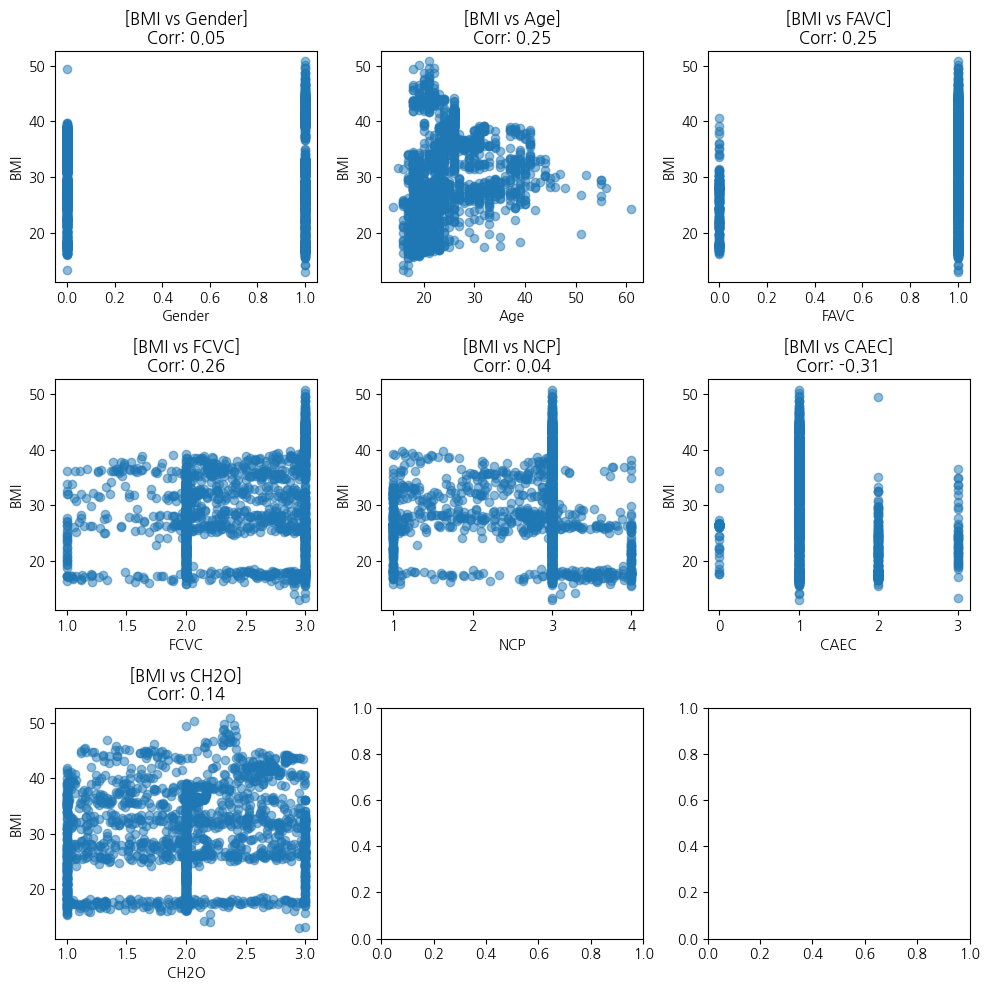

In [147]:
## BMI과의 상관계수 시각화
columns = ['Gender', 'Age', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))


# 컬럼별 산점도 그래프 생성
for idx, col in enumerate(columns):
    row = idx //3  # 행 인덱스
    col_idx = idx % 3 # 열 인덱스
  

    # 각 그래프에 산점도 플롯 추가
    ax = axes[row, col_idx]
    correlation = DF['BMI'].corr(DF[col])  # 상관계수 계산
    ax.scatter(DF[col], DF['BMI'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('BMI')
    ax.set_title(f'[BMI vs {col}]\nCorr: {correlation:.2f}')


# 전체 레이아웃 조정 및 출력
plt.tight_layout()
plt.savefig("corr1.png", dpi=300, transparent=True)
plt.show()

BMI 연관성 있는 데이터
- FVAC, FCVC
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리 

In [81]:
## 학습관련 모듈로딩
from sklearn.linear_model import LinearRegression						## ML 알고리즘 모듈
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score		## 성능평가 관련 모듈
from sklearn.model_selection import train_test_split		

In [82]:
# 데이터 준비
feature = DF[['FAVC', 'FCVC', 'CH2O', 'Gender', 'Age']]  # 피처: FVAC, FCVC, Ch2O, Gender, Age
target = DF['BMI']  # 타겟: BMI

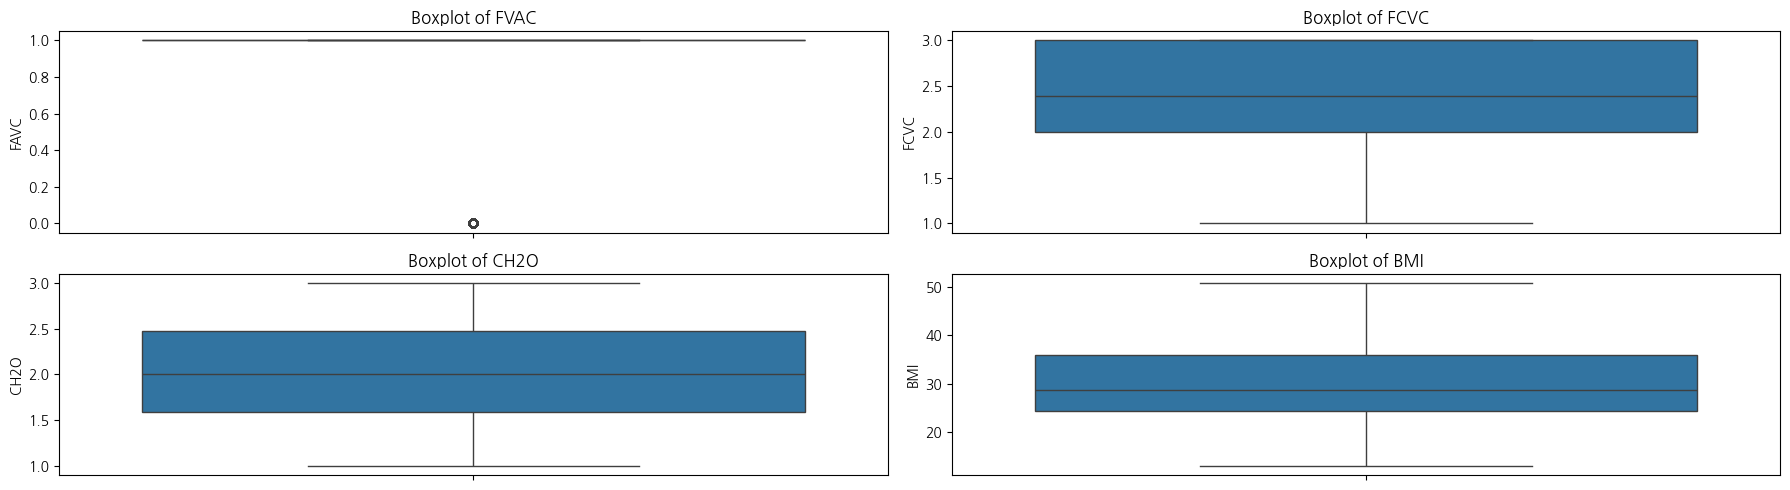

In [83]:
# 이상치 확인을 위한 Boxplot 그리기
fig, axes = plt.subplots(2, 2, figsize=(18, 5))

# FVAC (Frequency of Vegetable Consumption)
sns.boxplot(y=DF['FAVC'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of FVAC')

# FCVC (Frequency of Consumption of Vegetables per Meal)
sns.boxplot(y=DF['FCVC'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of FCVC')

# CH2O
sns.boxplot(y=DF['CH2O'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of CH2O')

# BMI (Body Mass Index)
sns.boxplot(y=DF['BMI'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of BMI')

plt.tight_layout()
plt.savefig("boxplot1.png", dpi=300, transparent=True)
plt.show()

In [84]:
print(target.value_counts())

BMI
26.672763    16
18.178670    11
29.384757    11
25.648918     9
26.989619     9
             ..
39.612457     1
41.788797     1
40.510596     1
42.027755     1
44.084423     1
Name: count, Length: 1806, dtype: int64


In [85]:
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리
## - BMI는 연속형 변수
train_X, test_X, train_y, test_y = train_test_split(feature, target, 
													random_state=42,
													test_size=0.3)

In [86]:
LinearModel = LinearRegression()

In [87]:
LinearModel.fit(train_X, train_y)

LinearRegression()

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error	# 성능평가 모듈

In [89]:
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)


train_X shape: (1477, 5)
test_X shape: (634, 5)


In [90]:
# 예측 수행
pre_y_train = LinearModel.predict(train_X)
pre_y_test = LinearModel.predict(test_X)


In [91]:
# 모델 성능 평가
train_r2 = r2_score(train_y, pre_y_train)
test_r2 = r2_score(test_y, pre_y_test)

In [92]:
# 모델 손실 평가
train_rmse = np.sqrt(mean_squared_error(train_y, pre_y_train))
test_rmse = np.sqrt(mean_squared_error(test_y, pre_y_test))

In [93]:
train_mse = mean_squared_error(train_y, pre_y_train)
test_mse = mean_squared_error(test_y,pre_y_test)

train_mae = mean_absolute_error(train_y, pre_y_train)
test_mae = mean_absolute_error(test_y, pre_y_test)

In [94]:
# 모델 결과 출력
print(f"선형 회귀 예측 모델 적합도 (R² Score):")
print(f"  - 학습 데이터: {train_r2:.4f}")
print(f"  - 테스트 데이터: {test_r2:.4f}\n")

print(f"선형 회귀 예측 모델 RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse:.4f}")
print(f"  - 테스트 데이터: {test_rmse:.4f}\n")

print(f"선형 회귀 예측 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"선형 회귀 예측 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

선형 회귀 예측 모델 적합도 (R² Score):
  - 학습 데이터: 0.1914
  - 테스트 데이터: 0.2272

선형 회귀 예측 모델 RMSE (Root Mean Squared Error):
  - 학습 데이터: 7.1482
  - 테스트 데이터: 7.1753

선형 회귀 예측 모델 MSE (Mean Squared Error):
  - 학습 데이터: 51.0964
  - 테스트 데이터: 51.4845

선형 회귀 예측 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 6.0054
  - 테스트 데이터: 5.9956



-> 적합도가 너무 낮고, rmse가 낮아서 과소 적합이다

In [95]:
# 모델 회귀 계수 출력
print(f"회귀 계수 (coefficient): {LinearModel.coef_}")
print(f"절편 (intercept): {LinearModel.intercept_}")

회귀 계수 (coefficient): [5.82528857 3.76901954 1.6123492  0.41815094 0.27418931]
절편 (intercept): 5.28703102236037


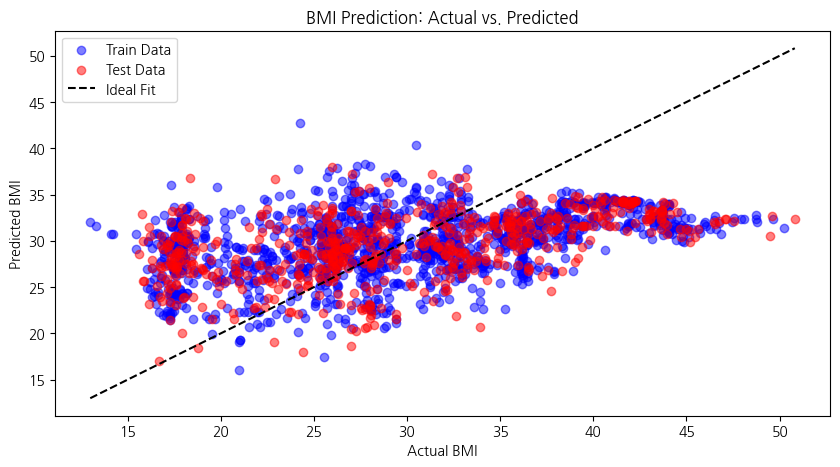

In [96]:
# 시각화: 실제 BMI vs 예측 BMI
plt.figure(figsize=(10, 5))
plt.scatter(train_y, pre_y_train, alpha=0.5, label='Train Data', color='blue')
plt.scatter(test_y, pre_y_test, alpha=0.5, label='Test Data', color='red')
plt.plot([min(target), max(target)], [min(target), max(target)], linestyle='--', color='black', label='Ideal Fit')
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("BMI Prediction: Actual vs. Predicted")
plt.legend()
plt.show()

다항회귀 예측

In [97]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [98]:
# 다항 특성 변환 (2차 다항 회귀)
poly = PolynomialFeatures(degree=2)

In [99]:
# 학습용 피쳐 제공 (학습용을 기준으로 정보 제공)
X_train_plm = poly.fit_transform(train_X)
X_test_plm = poly.transform(test_X)

In [100]:
plm = LinearRegression() 

In [101]:
plm.fit(X_train_plm, train_y)

LinearRegression()

In [102]:
pre_y_train_plm = plm.predict(X_train_plm)
pre_y_test_plm = plm.predict(X_test_plm)

In [103]:
# 모델 성능 평가
train_r2_plm = r2_score(train_y, pre_y_train_plm)
test_r2_plm = r2_score(test_y, pre_y_test_plm)

In [104]:
# 모델 손실 평가
train_rmse_plm = np.sqrt(mean_squared_error(train_y, pre_y_train_plm))
test_rmse_plm = np.sqrt(mean_squared_error(test_y, pre_y_test_plm))

In [105]:
train_mse = mean_squared_error(train_y, pre_y_train_plm)
test_mse = mean_squared_error(test_y,pre_y_test_plm)

train_mae = mean_absolute_error(train_y, pre_y_train_plm)
test_mae = mean_absolute_error(test_y, pre_y_test_plm)

In [106]:
# 모델 결과 출력
print(f"다항 회귀 예측 모델 적합도 (R² Score):")
print(f"  - 학습 데이터: {train_r2_plm:.4f}")
print(f"  - 테스트 데이터: {test_r2_plm:.4f}\n")

print(f"다항 회귀 예측 모델 RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse_plm:.4f}")
print(f"  - 테스트 데이터: {test_rmse_plm:.4f}\n")

print(f"다항 회귀 예측 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"다항 회귀 예측 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

다항 회귀 예측 모델 적합도 (R² Score):
  - 학습 데이터: 0.3511
  - 테스트 데이터: 0.3557

다항 회귀 예측 모델 RMSE (Root Mean Squared Error):
  - 학습 데이터: 6.4033
  - 테스트 데이터: 6.5518

다항 회귀 예측 모델 MSE (Mean Squared Error):
  - 학습 데이터: 41.0022
  - 테스트 데이터: 42.9259

다항 회귀 예측 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 5.1776
  - 테스트 데이터: 5.3204



KNN 군집

In [107]:
from sklearn.neighbors import KNeighborsRegressor												# 머신러닝 알고리즘 모듈
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error	# 성능평가 모듈
from sklearn.model_selection import train_test_split											# 데이터셋 분리 모듈
import matplotlib.pyplot as plt
import pandas as pd

In [108]:
# KNN 알고리즘 객체 / 인스턴스 생성
KNN_model = KNeighborsRegressor()

In [109]:
# 학습 진행
KNN_model.fit(train_X, train_y)

KNeighborsRegressor()

학습 평가

In [110]:
# K 값 범위 설정 (1~30까지 테스트)
k_values = range(1, 31)

In [111]:
# 결과 저장 리스트
train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

In [112]:
# KNN 모델을 K값마다 학습하고 성능 평가
for k in k_values:
    KNN_model = KNeighborsRegressor(n_neighbors=k)
    KNN_model.fit(train_X, train_y)
    
    # 예측 수행
    train_pred = KNN_model.predict(train_X)
    test_pred = KNN_model.predict(test_X)
    
    # R² Score 계산
    train_r2 = r2_score(train_y, train_pred)
    test_r2 = r2_score(test_y, test_pred)
    
    # RMSE 계산
    train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
    test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))
    
    # 결과 저장
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

In [113]:
# 데이터프레임 생성
import pandas as pd
results_df = pd.DataFrame({
    "K": list(k_values),
    "Train R² Score": train_r2_scores,
    "Test R² Score": test_r2_scores,
    "Train RMSE": train_rmse_scores,
    "Test RMSE": test_rmse_scores
})

In [114]:
# 데이터프레임 확인 (오류 수정)
print(results_df.head(50))  

     K  Train R² Score  Test R² Score  Train RMSE  Test RMSE
0    1        0.904956       0.299868    2.450688   6.829652
1    2        0.796779       0.509537    3.583532   5.716254
2    3        0.749306       0.528922    3.980143   5.602156
3    4        0.707952       0.518774    4.295897   5.662173
4    5        0.676756       0.516713    4.519518   5.674285
5    6        0.644819       0.503242    4.737525   5.752825
6    7        0.631601       0.506998    4.824871   5.731033
7    8        0.615014       0.492149    4.932297   5.816704
8    9        0.595091       0.478228    5.058309   5.895887
9   10        0.583242       0.488884    5.131788   5.835368
10  11        0.571422       0.478468    5.204053   5.894526
11  12        0.560004       0.467870    5.272919   5.954118
12  13        0.546759       0.459851    5.351697   5.998813
13  14        0.530503       0.452261    5.446819   6.040813
14  15        0.521769       0.446708    5.497253   6.071356
15  16        0.512156  

In [115]:
# 훈련 데이터 셋으로 예측 => predict()
train_pred = KNN_model.predict(train_X)
test_pred = KNN_model.predict(test_X)

In [116]:
# 모델 성능 평가 => R² Score (결정 계수)
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)
print(f"KNN 군집 모델 적합도 (R² Score):")
print(f"  - 학습 데이터: {train_r2:.4f}")
print(f"  - 테스트 데이터: {test_r2:.4f}\n")

# 모델 손실 평가 => RMSE, MSE, MAE
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)

train_mae = mean_absolute_error(train_y, train_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print(f"KNN 군집 모델 RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse:.4f}")
print(f"  - 테스트 데이터: {test_rmse:.4f}\n")

print(f"KNN 군집 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"KNN 군집 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

KNN 군집 모델 적합도 (R² Score):
  - 학습 데이터: 0.4563
  - 테스트 데이터: 0.4132

KNN 군집 모델 RMSE (Root Mean Squared Error):
  - 학습 데이터: 5.8614
  - 테스트 데이터: 6.2525

KNN 군집 모델 MSE (Mean Squared Error):
  - 학습 데이터: 34.3564
  - 테스트 데이터: 39.0942

KNN 군집 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 4.4383
  - 테스트 데이터: 4.7242



In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import graphviz

## 학습 진행
from sklearn.tree import DecisionTreeRegressor		## 모델 클래스
from sklearn.tree import export_graphviz			## 모델 시각화 관련

In [118]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행 함
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [119]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

In [120]:
dtModel = DecisionTreeRegressor(max_depth=9, min_samples_split=30, min_samples_leaf=5, max_features="sqrt", random_state=42)
dtModel.fit(train_scaled_X, train_y)

DecisionTreeRegressor(max_depth=9, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=30, random_state=42)

In [121]:
train_X.columns, train_y.unique()

(Index(['FAVC', 'FCVC', 'CH2O', 'Gender', 'Age'], dtype='object'),
 array([39.6815838 , 40.61910292, 28.20244898, ..., 39.21632653,
        27.60613845, 31.80398208]))

In [122]:
## 학습 모델 시각화 파일 저장
export_graphviz(dtModel, out_file='BMIDT.dot',
				feature_names=train_X.columns,
				class_names=train_y.unique())

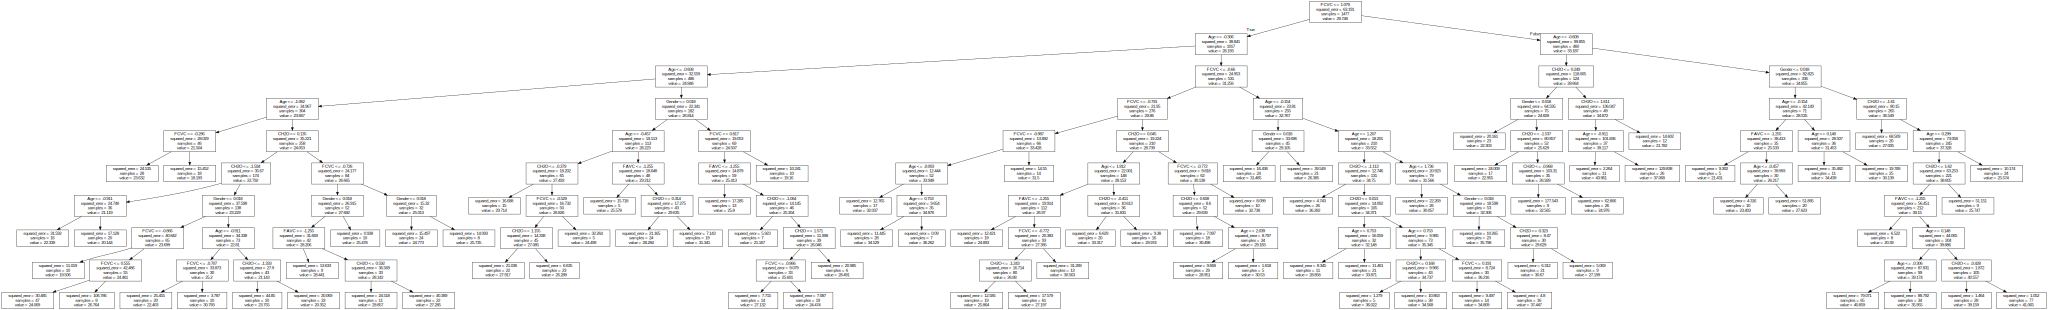

In [123]:
## 모델 파일 dot ===> 시각화
import graphviz

## 파일 열기
with open('BMIDT.dot') as f:
	data=f.read()

## 파일에서 가져온 데이터 출력
# print(data)
graphviz.Source(data)

성능평가

In [124]:
##  훈련용 성능과 테스트용 성능평가
## [1] 모델의 성능평가 메서드 : score()  accuracy로 성능평가 결과 반환
train_score =dtModel.score(train_scaled_X, train_y)
test_score = dtModel.score(test_scaled_X, test_y)

print(f'[Train] score : {train_score},  [Test] score : {test_score}')

[Train] score : 0.6034924176880688,  [Test] score : 0.5135736040855506


In [125]:
## [2] 다양한 성능평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('[TRAIN]------------------------')
train_pre = dtModel.predict(train_scaled_X)
test_pre = dtModel.predict(test_scaled_X)

# R^2 (결정 계수) 평가
train_r2 = r2_score(train_y, train_pre)
print(f'결정 계수 (R²): {train_r2:.4f}')

print('[TEST]------------------------')
test_pre = dtModel.predict(test_scaled_X)

# R^2 (결정 계수) 평가
test_r2 = r2_score(test_y, test_pre)
print(f'결정 계수 (R²): {test_r2:.4f}')


[TRAIN]------------------------
결정 계수 (R²): 0.6035
[TEST]------------------------
결정 계수 (R²): 0.5136


In [126]:
# 모델 성능 평가 => R² Score (결정 계수)
train_r2 = r2_score(train_y, train_pre)
test_r2 = r2_score(test_y, test_pre)
print(f"의사결정트리 모델 적합도 (R² Score):")
print(f"  - 학습 데이터: {train_r2:.4f}")
print(f"  - 테스트 데이터: {test_r2:.4f}\n")

# 모델 손실 평가 => RMSE, MSE, MAE
train_rmse = np.sqrt(mean_squared_error(train_y, train_pre))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pre))

train_mse = mean_squared_error(train_y, train_pre)
test_mse = mean_squared_error(test_y, test_pre)

train_mae = mean_absolute_error(train_y, train_pre)
test_mae = mean_absolute_error(test_y, test_pre)

print(f"의사결정트리 모델 RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse:.4f}")
print(f"  - 테스트 데이터: {test_rmse:.4f}\n")

print(f"의사결정트리 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"의사결정트리 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

의사결정트리 모델 적합도 (R² Score):
  - 학습 데이터: 0.6035
  - 테스트 데이터: 0.5136

의사결정트리 모델 RMSE (Root Mean Squared Error):
  - 학습 데이터: 5.0056
  - 테스트 데이터: 5.6927

의사결정트리 모델 MSE (Mean Squared Error):
  - 학습 데이터: 25.0556
  - 테스트 데이터: 32.4067

의사결정트리 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 3.5785
  - 테스트 데이터: 4.0938



랜덤포레스트 

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
rfModel = RandomForestRegressor(n_estimators=500, max_depth=12, min_samples_split=30, min_samples_leaf=10, max_features="sqrt", random_state=42)
rfModel.fit(train_scaled_X, train_y)

RandomForestRegressor(max_depth=12, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=30, n_estimators=500, random_state=42)

In [129]:
# 모델 예측
train_pred = rfModel.predict(train_scaled_X)
test_pred = rfModel.predict(test_scaled_X)

In [130]:
# R² Score 계산 (모델 적합도 평가)
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)

In [131]:
# RMSE (Root Mean Squared Error) 계산
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

In [132]:
# 모델 성능 평가 => R² Score (결정 계수)
train_r2 = r2_score(train_y, train_pred)
test_r2 = r2_score(test_y, test_pred)
print(f"랜덤 포레스트 모델 적합도 (R² Score):")
print(f"  - 학습 데이터: {train_r2:.4f}")
print(f"  - 테스트 데이터: {test_r2:.4f}\n")

# 모델 손실 평가 => RMSE, MSE, MAE
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)

train_mae = mean_absolute_error(train_y, train_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print(f"랜덤 포레스트 모델 RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse:.4f}")
print(f"  - 테스트 데이터: {test_rmse:.4f}\n")

print(f"랜덤 포레스트 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"랜덤 포레스트 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

랜덤 포레스트 모델 적합도 (R² Score):
  - 학습 데이터: 0.6198
  - 테스트 데이터: 0.5682

랜덤 포레스트 모델 RMSE (Root Mean Squared Error):
  - 학습 데이터: 4.9013
  - 테스트 데이터: 5.3633

랜덤 포레스트 모델 MSE (Mean Squared Error):
  - 학습 데이터: 24.0223
  - 테스트 데이터: 28.7647

랜덤 포레스트 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 3.7723
  - 테스트 데이터: 4.1834



In [133]:
!pip install xgboost

In [158]:
from xgboost import XGBRegressor

In [159]:
xgbModel = XGBRegressor(
    n_estimators=2500, max_depth=8, 
	learning_rate=0.004, 
    subsample=0.5, 
	colsample_bytree=0.9, 
    reg_alpha=4.0, 
	reg_lambda=8.0, 
    random_state=42
)

xgbModel.fit(train_scaled_X, train_y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.004, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [156]:
# 모델 예측
train_pred =xgbModel.predict(train_scaled_X)
test_pred = xgbModel.predict(test_scaled_X)

In [157]:
# 모델 성능 평가
train_score = xgbModel.score(train_scaled_X, train_y)
test_score = xgbModel.score(test_scaled_X, test_y)
print(f"XGBoost R² Score:")
print(f"  - 학습 데이터: {train_score:.4f}")
print(f"  - 테스트 데이터: {test_score:.4f}\n")

# 모델 손실 평가 => RMSE, MSE, MAE
train_rmse = np.sqrt(mean_squared_error(train_y, train_pred))
test_rmse = np.sqrt(mean_squared_error(test_y, test_pred))

train_mse = mean_squared_error(train_y, train_pred)
test_mse = mean_squared_error(test_y, test_pred)

train_mae = mean_absolute_error(train_y, train_pred)
test_mae = mean_absolute_error(test_y, test_pred)

print(f"XGBoost RMSE (Root Mean Squared Error):")
print(f"  - 학습 데이터: {train_rmse:.4f}")
print(f"  - 테스트 데이터: {test_rmse:.4f}\n")

print(f"XGBoost 모델 MSE (Mean Squared Error):")
print(f"  - 학습 데이터: {train_mse:.4f}")
print(f"  - 테스트 데이터: {test_mse:.4f}\n")

print(f"XGBoost 모델 MAE (Mean Absolute Error):")
print(f"  - 학습 데이터: {train_mae:.4f}")
print(f"  - 테스트 데이터: {test_mae:.4f}\n")

XGBoost R² Score:
  - 학습 데이터: 0.8096
  - 테스트 데이터: 0.6288

XGBoost RMSE (Root Mean Squared Error):
  - 학습 데이터: 3.4689
  - 테스트 데이터: 4.9729

XGBoost 모델 MSE (Mean Squared Error):
  - 학습 데이터: 12.0331
  - 테스트 데이터: 24.7301

XGBoost 모델 MAE (Mean Absolute Error):
  - 학습 데이터: 2.4224
  - 테스트 데이터: 3.6547



In [149]:
# BMI 예측 수행
bmi_predictions = xgbModel.predict(train_scaled_X)

In [151]:
# 예측 결과를 데이터프레임으로 변환
bmi_results = pd.DataFrame({
    "Actual BMI": train_y,      # 실제 BMI 값
    "Predicted BMI": bmi_predictions  # 예측된 BMI 값
})


In [152]:
# 예측 결과 확인
display(bmi_results.head(20))  

,Actual BMI,Predicted BMI
1930,39.681584,39.460033
1803,40.619103,40.964348
1198,28.202449,27.497091
15,22.837370,21.508656
816,26.892323,27.879978
1013,25.691851,28.886982
1680,38.171488,37.529057
1839,43.647347,42.923382
570,16.399128,26.922754
1387,32.815254,31.924940


In [153]:
import koreanize_matplotlib

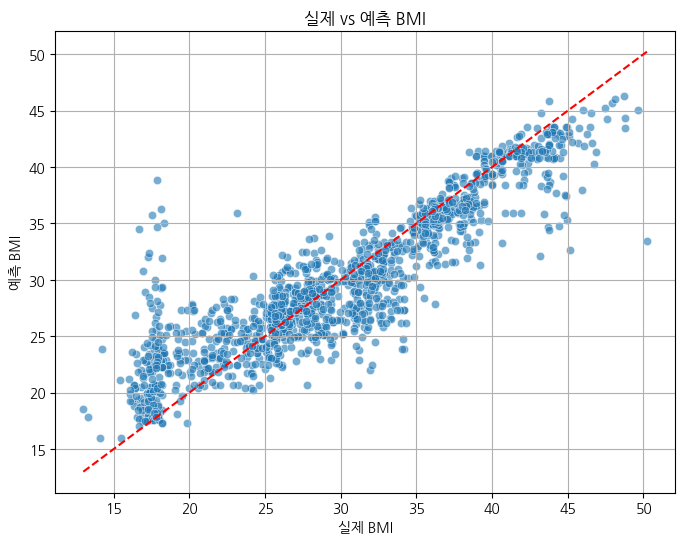

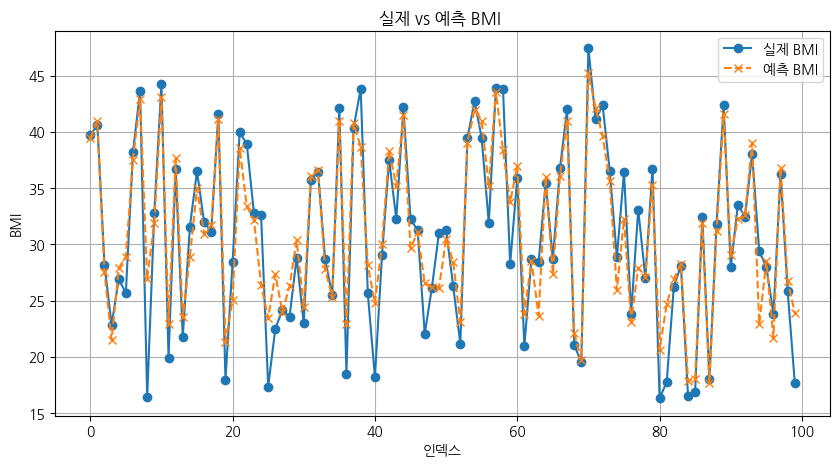

In [154]:
# 시각화 - 실제 값 vs 예측 값 산점도 그래프
plt.figure(figsize=(8, 6))
sns.scatterplot(x=bmi_results["Actual BMI"], y=bmi_results["Predicted BMI"], alpha=0.6)
plt.plot([bmi_results["Actual BMI"].min(), bmi_results["Actual BMI"].max()], 
         [bmi_results["Actual BMI"].min(), bmi_results["Actual BMI"].max()], 
         linestyle="--", color="red")  # y=x 선 추가 (완벽한 예측일 경우)

plt.xlabel("실제 BMI")
plt.ylabel("예측 BMI")
plt.title("실제 vs 예측 BMI")
plt.grid()
plt.savefig("scattergraph1.png", dpi=300, transparent=True)
plt.show()


# 시각화 - 실제 값 vs 예측 값 선 그래프
plt.figure(figsize=(10, 5))
plt.plot(bmi_results["Actual BMI"].values[:100], label="실제 BMI", marker="o")
plt.plot(bmi_results["Predicted BMI"].values[:100], label="예측 BMI", marker="x", linestyle="dashed")
plt.xlabel("인덱스")
plt.ylabel("BMI")
plt.title("실제 vs 예측 BMI ")
plt.legend()
plt.grid()
plt.savefig("predictgraph1.png", dpi=300, transparent=True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib 

In [ ]:
# 모델 이름 리스트
models = ["선형 회귀", "다항 회귀", "KNN", "의사결정트리", "랜덤 포레스트", "XGBoost"]

In [ ]:
# 성능 지표 데이터
train_r2 = [0.1914, 0.3511, 0.4563, 0.6035, 0.6198, 0.8096]
test_r2 = [0.2272, 0.3557, 0.4132, 0.5136, 0.5682, 0.6288]

train_rmse = [7.1482, 6.4033, 5.8614, 5.0056, 4.9013, 3.4689]
test_rmse = [7.1753, 6.5518, 6.2525, 5.6927, 5.3633, 4.9729]

train_mse = [51.0964, 41.0022, 34.3564, 25.0556, 24.0223, 12.0331]
test_mse = [51.4845, 42.9259, 39.0942, 32.4067, 28.7647, 24.7301]

train_mae = [6.0054, 5.1776, 4.4383, 3.5785, 3.7723, 2.4224]
test_mae = [5.9956, 5.3204, 4.7242, 4.0938, 4.1834, 3.6547]

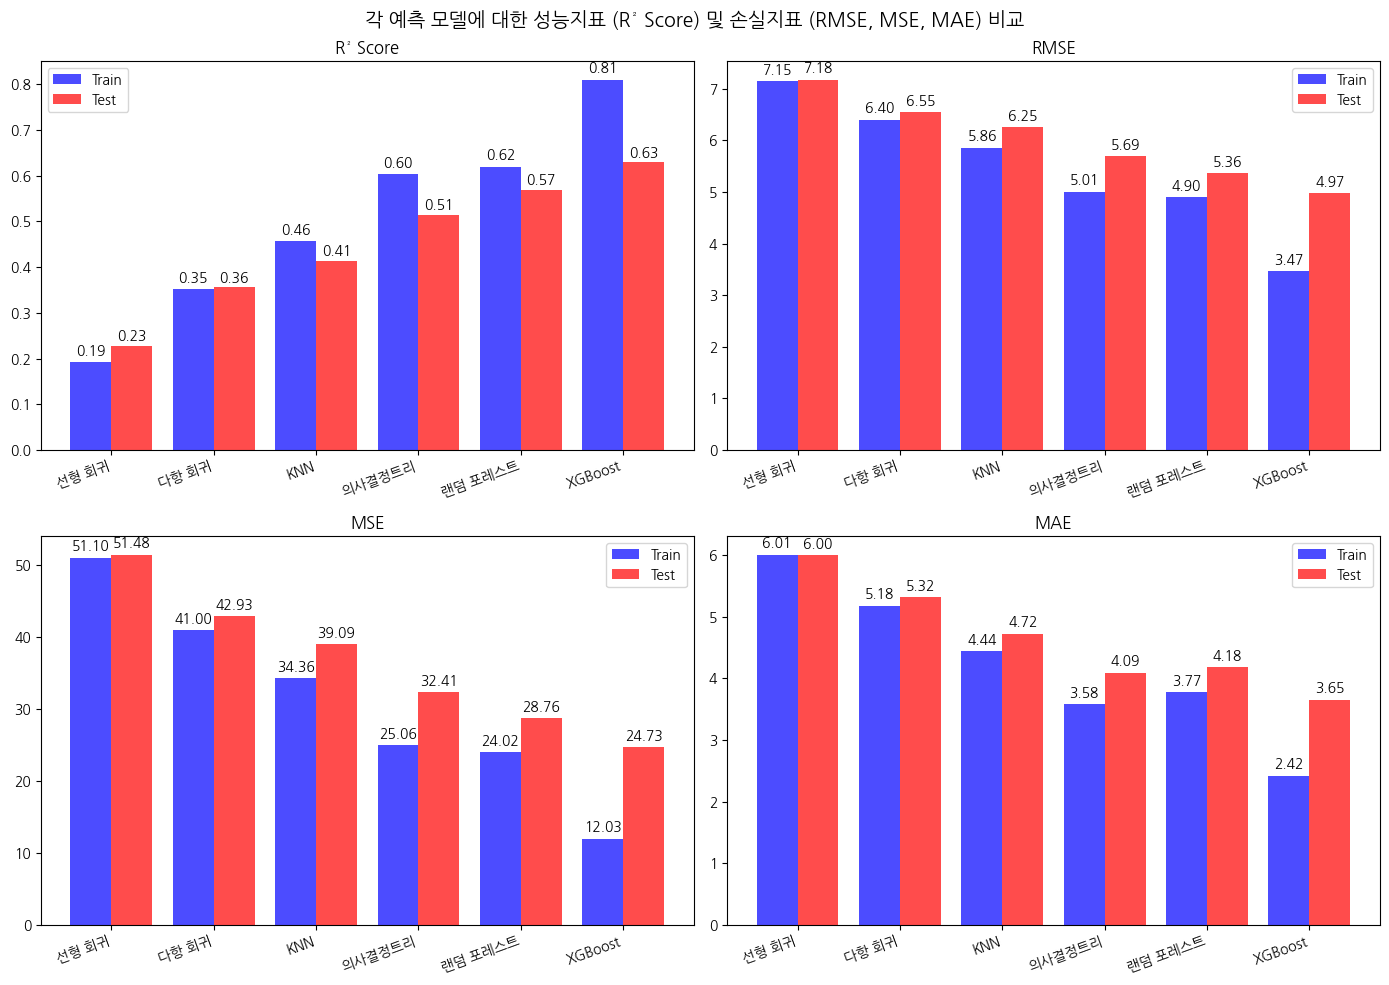

In [ ]:
# 그래프 스타일 설정
bar_width = 0.4
x = np.arange(len(models))

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = [("R² Score", train_r2, test_r2), ("RMSE", train_rmse, test_rmse),
           ("MSE", train_mse, test_mse), ("MAE", train_mae, test_mae)]

for ax, (metric, train_values, test_values) in zip(axes.flatten(), metrics):
    ax.bar(x - bar_width/2, train_values, bar_width, label="Train", color='blue', alpha=0.7)
    ax.bar(x + bar_width/2, test_values, bar_width, label="Test", color='red', alpha=0.7)

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=20, ha="right")
    ax.set_title(metric)
    ax.legend()

    # 수치 라벨링
    for i in range(len(models)):
        ax.text(i - bar_width/2, train_values[i] + max(train_values)*0.02, f"{train_values[i]:.2f}", ha='center', color='black', fontsize=10)
        ax.text(i + bar_width/2, test_values[i] + max(test_values)*0.02, f"{test_values[i]:.2f}", ha='center', color='black', fontsize=10)

plt.suptitle("각 예측 모델에 대한 성능지표 (R² Score) 및 손실지표 (RMSE, MSE, MAE) 비교", fontsize=14)
plt.tight_layout()
plt.savefig("modeleffectgraph1.png", dpi=300, transparent=True)
plt.show()